# Causal interpretability for Software Engineering 

## Introduction Interpretability for SE

What is Interpretability for SE?

## Case of study

### Correlation analysis??

### Causal analysis

You can download SEMERU datasets at  https://huggingface.co/semeru

In [4]:
from datasets import load_dataset
import pandas as pd

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
d_control = "semeru/Code-code-galeras-prompting-3k-control"

In [ ]:
t1 = "semeru/Code-code-galeras-prompting-3k-treatment-1"

In [6]:
dataset = "semeru/Code-code-galeras-prompting-3k-treatment-2"

In [8]:
treatments = "semeru/galeras-causal4se-3k-levenshtein"

In [7]:
dataset = load_dataset(dataset, cache_dir="../../datax" )

In [8]:
dataset.set_format(type='pandas')

In [9]:
df = dataset['train'][:]

Stablish confunder variables as $w\in W$

In [10]:
columns={'vocab_size':'w_vocab_size','n_words':'w_n_words','n_ast_errors':'w_n_ast_errors','ast_levels':'w_ast_levels','n_whitespaces':'w_n_whitespaces','complexity':'w_complexity','nloc':'w_nloc','token_counts':'w_token_counts','n_ast_nodes':'w_n_ast_nodes','ast_errors':'w_ast_errors','n_identifiers':'w_n_identifiers'}
df = df.rename(columns=columns)
df

,commit_id,code,repo,documentation,id,w_n_ast_errors,w_ast_errors,w_vocab_size,d_id,T1,...,file_name,path,w_complexity,w_n_words,w_ast_levels,url,control,language,T2,w_n_whitespaces
0,f65417656ba8c59438d832b6e2a431f78d40c21c,"def rolling(self, *args, **kwargs) -> RollingG...",pandas,{'docstring': ' Return a rolling group...,167770,0,,17,40113,"{'predicted': {'n_whitespaces': 82, 'n_words':...",...,groupby.py,pandas/core/groupby/groupby.py,1,18,9,https://github.com/pandas-dev/pandas.git,"{'predicted': {'n_whitespaces': 77, 'n_words':...",Python,"{'predicted': {'n_whitespaces': 45, 'n_words':...",101
1,2a05ccdb07cff88e56661dee8a9271859354027f,"def expected_degree_graph(w, seed=None, selflo...",networkx,{'docstring': 'Returns a random graph with giv...,176730,0,,97,42064,"{'predicted': {'n_whitespaces': 555, 'n_words'...",...,degree_seq.py,networkx/generators/degree_seq.py,13,179,17,https://github.com/networkx/networkx.git,"{'predicted': {'n_whitespaces': 526, 'n_words'...",Python,"{'predicted': {'n_whitespaces': 328, 'n_words'...",417
2,4c58179509e6f6047789efb0a95c2b0e20cb6c8f,"def save(self, path):\n \n os.ma...",mlflow,{'docstring': 'Write the evaluation results to...,19151,0,,36,2897,"{'predicted': {'n_whitespaces': 88, 'n_words':...",...,base.py,mlflow/models/evaluation/base.py,3,49,13,https://github.com/mlflow/mlflow.git,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",Python,"{'predicted': {'n_whitespaces': 40, 'n_words':...",208
3,3255fa4ebb9fbc1df6bb063c0eb77a0298ca8f72,def test_build_group_generic_issue_attachment(...,sentry,{'docstring': 'Test that a generic issue type'...,89933,0,,38,18592,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",...,test_message_builder.py,tests/sentry/integrations/slack/test_message_b...,1,51,12,https://github.com/getsentry/sentry.git,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",Python,"{'predicted': {'n_whitespaces': 120, 'n_words'...",154
4,b3bc4e734528d3b186c3a38a6e73e106c3555cc7,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive,{'docstring': ' apply your own functio...,179114,0,,34,42906,"{'predicted': {'n_whitespaces': 248, 'n_words'...",...,ImageProcessor.py,xlib/image/ImageProcessor.py,3,45,13,https://github.com/iperov/DeepFaceLive.git,"{'predicted': {'n_whitespaces': 76, 'n_words':...",Python,"{'predicted': {'n_whitespaces': 62, 'n_words':...",127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,494bd9ef78313436f0424b918f200dab8fc7c20b,"def get_data(conditions, filters):\n\tdata = f...",erpnext,{'docstring': ' SELECT so.transaction_dat...,67430,0,,13,14521,"{'predicted': {'n_whitespaces': 132, 'n_words'...",...,sales_order_analysis.py,erpnext/selling/report/sales_order_analysis/sa...,1,14,11,https://github.com/frappe/erpnext.git,"{'predicted': {'n_whitespaces': 11, 'n_words':...",Python,"{'predicted': {'n_whitespaces': 527, 'n_words'...",5
2919,8198943edd73a363c266633e1aa5b2a9e9c9f526,def getcoroutinelocals(coroutine):\n \n ...,XX-Net,{'docstring': ' Get the mapping of corouti...,218391,0,,33,55277,"{'predicted': {'n_whitespaces': 87, 'n_words':...",...,inspect.py,python3.10.4/Lib/inspect.py,2,40,9,https://github.com/XX-net/XX-Net.git,"{'predicted': {'n_whitespaces': 39, 'n_words':...",Python,"{'predicted': {'n_whitespaces': 73, 'n_words':...",140
2920,84afc5193d38057e2e2badf9c889ea87d80d8fbf,"def _forward_over_back_hessian(f, params, use_...",keras,{'docstring': 'Computes the full Hessian matri...,272189,0,,13,80975,"{'predicted': {'n_whitespaces': 94, 'n_words':...",...,forwardprop_test.py,keras/integration_test/forwardprop_test.py,1,14,9,https://github.com/keras-team/keras.git,"{'predicted': {'n_whitespaces': 47, 'n_words':...",Python,"{'predicted': {'n_whitespaces': 143, 'n_words'...",51
2921,0c20ba744966d23ede67cffd7c5d2e0d01cd0658,"def predict_proba(self, X):\n \n ...",scikit-learn,{'docstring': 'Probability estimates. ...,259605,0,,85,75837,"{'predicted': {'n_whitespaces': 401, 'n_words'...",...,_stochasti

Since we have nested data for some columns we will flatten all this information, i.e. flattening the documentation column and its related metrics such as the number of words

In [11]:
documentation_df = pd.concat([df['id'], df['code'], df['documentation'].apply(pd.Series)], axis=1)
documentation_df

,id,code,docstring,language,n_whitespaces,n_words,vocab_size
0,167770,"def rolling(self, *args, **kwargs) -> RollingG...","\n Return a rolling grouper, providing ...",en,24,9,8
1,176730,"def expected_degree_graph(w, seed=None, selflo...",Returns a random graph with given expected deg...,en,524,298,173
2,19151,"def save(self, path):\n \n os.ma...",Write the evaluation results to the specified ...,en,9,10,9
3,89933,def test_build_group_generic_issue_attachment(...,Test that a generic issue type's Slack alert c...,en,11,12,12
4,179114,"def apply(self, func, mask=None) -> 'ImageProc...",\n apply your own function on internal ...,en,79,31,30
...,...,...,...,...,...,...,...
2918,67430,"def get_data(conditions, filters):\n\tdata = f...",\n\t\tSELECT\n\t\t\tso.transaction_date as dat...,en,112,146,102
2919,218391,def getcoroutinelocals(coroutine):\n \n ...,\n Get the mapping of coroutine local varia...,en,36,27,22
2920,272189,"def _forward_over_back_hessian(f, params, use_...",Computes the full Hessian matrix for the scala...,en,166,105,73
2921,259605,"def predict_proba(self, X):\n \n ...",Probability estimates.\n\n This method ...,en,339,138,98


In [12]:
def flatten_treatment(df,t_name,binary_treatment):
    prefix = "e"
    result = pd.concat([df, df[t_name].apply(pd.Series)], axis=1)
    result = pd.concat([result.drop(['predicted'], axis=1), result['predicted'].apply(pd.Series)], axis=1)
    new_column_names = {'n_whitespaces':prefix+'_n_whitespaces', 'n_words':prefix+'_n_words', 'vocab_size':prefix+'_vocab_size'}
    result.rename(columns=new_column_names, inplace=True)
    
    
    prefix = "i"
    result = pd.concat([result.drop(['prompt'],axis=1),result['prompt'].apply(pd.Series)], axis=1)
    new_column_names = {'n_whitespaces':prefix+'_n_whitespaces', 'p_n_words':prefix+'_n_words', 'vocab_size':prefix+'_vocab_size'}
    result.rename(columns=new_column_names, inplace=True)
    result['i_binary_treatment'] = binary_treatment
    result['i_treatment'] = t_name
    
    return result

Create each treatment dataset $t\in T$.

- Control template: "Complete the following python method: ```{Random_cut code}```",
- Treatment 1 (T1): "Write a Python method that starts with ```{Function Name}``` , I need to complete this function. Remove comments, summary and descriptions.",
- Treatment 2 (T2): "Remeber you have a Python function named ```{Method Signature}```, the function starts with the following code ```{Random_cut code}```. The description for the function is: ```{docstring}``` remove comments; remove summary; remove description; Return only the code"

In [13]:
control_df = flatten_treatment(df, "control", False)
T1= flatten_treatment(df, "T1", True)
T2 = flatten_treatment(df, "T2", True)

In [14]:
T1.columns.tolist()

['commit_id',
 'code',
 'repo',
 'documentation',
 'id',
 'w_n_ast_errors',
 'w_ast_errors',
 'w_vocab_size',
 'd_id',
 'T1',
 'commit_message',
 'fun_name',
 'w_n_identifiers',
 'w_nloc',
 'random_cut',
 'w_n_ast_nodes',
 'w_token_counts',
 'file_name',
 'path',
 'w_complexity',
 'w_n_words',
 'w_ast_levels',
 'url',
 'control',
 'language',
 'T2',
 'w_n_whitespaces',
 'e_n_whitespaces',
 'e_n_words',
 'prediction',
 'e_vocab_size',
 'i_n_whitespaces',
 'i_n_words',
 'template',
 'i_vocab_size',
 'i_binary_treatment',
 'i_treatment']

In [15]:
treatments_df = pd.concat([control_df, T1, T2], join="inner", ignore_index=True)
treatments_df = treatments_df.drop(columns=['control', 'T1', 'T2'])


In [16]:
treatments_df

,commit_id,code,repo,documentation,id,w_n_ast_errors,w_ast_errors,w_vocab_size,d_id,commit_message,...,e_n_whitespaces,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,i_binary_treatment,i_treatment
0,f65417656ba8c59438d832b6e2a431f78d40c21c,"def rolling(self, *args, **kwargs) -> RollingG...",pandas,{'docstring': ' Return a rolling group...,167770,0,,17,40113,TYP: more return annotations in core/ (#47618)...,...,77,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control
1,2a05ccdb07cff88e56661dee8a9271859354027f,"def expected_degree_graph(w, seed=None, selflo...",networkx,{'docstring': 'Returns a random graph with giv...,176730,0,,97,42064,Remove redundant py2 numeric conversions (#566...,...,526,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control
2,4c58179509e6f6047789efb0a95c2b0e20cb6c8f,"def save(self, path):\n \n os.ma...",mlflow,{'docstring': 'Write the evaluation results to...,19151,0,,36,2897,Improve evaluation api (#5256)\n\n* init\r\n\r...,...,0,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control
3,3255fa4ebb9fbc1df6bb063c0eb77a0298ca8f72,def test_build_group_generic_issue_attachment(...,sentry,{'docstring': 'Test that a generic issue type'...,89933,0,,38,18592,feat(integrations): Support generic issue type...,...,0,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control
4,b3bc4e734528d3b186c3a38a6e73e106c3555cc7,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive,{'docstring': ' apply your own functio...,179114,0,,34,42906,ImageProcessor.py refactoring,...,76,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,494bd9ef78313436f0424b918f200dab8fc7c20b,"def get_data(conditions, filters):\n\tdata = f...",erpnext,{'docstring': ' SELECT so.transaction_dat...,67430,0,,13,14521,style: format code with black,...,527,170,"Sure! Here's the code without the comments, su...",122,148,188,"Remeber you have a Python function named {}, t...",134,True,T2
8765,8198943edd73a363c266633e1aa5b2a9e9c9f526,def getcoroutinelocals(coroutine):\n \n ...,XX-Net,{'docstring': ' Get the mapping of corouti...,218391,0,,33,55277,add python 3.10.4 for windows,...,73,55,Certainly! Here's the code for the `getcorouti...,41,112,83,"Remeber you have a Python function named {}, t...",65,True,T2
8766,84afc5193d38057e2e2badf9c889ea87d80d8fbf,"def _forward_over_back_hessian(f, params, use_...",keras,{'docstring': 'Computes the full Hessian matri...,272189,0,,13,80975,Reformatting the codebase with black.\n\nPiper...,...,143,87,Sure! Here's the code for the `_forward_over_b...,65,243,150,"Remeber you have a Python function named {}, t...",104,True,T2
8767,0c20ba744966d23ede67cffd7c5d2e0d01cd0658,"def predict_proba(self, X):\n \n ...",scikit-learn,{'docstring': 'Probability estimates. ...,259605,0,,85,75837,"DEP loss ""log"" in favor of ""log loss"" in SGDCl...",...,374,116,"Certainly! Here's the code without comments, s...",78,846,274,"Remeber you have a Python function named {}, t...",180,True,T2


In [252]:
treatments_df.to_parquet("../../datax/treatments.parquet")

In [9]:
test = load_dataset(treatments, cache_dir="../../datax" )

In [10]:
test

DatasetDict({
    train: Dataset({
        features: ['commit_id', 'code', 'repo', 'documentation', 'id', 'w_n_ast_errors', 'w_ast_errors', 'w_vocab_size', 'd_id', 'commit_message', 'fun_name', 'w_n_identifiers', 'w_nloc', 'random_cut', 'w_n_ast_nodes', 'w_token_counts', 'file_name', 'path', 'w_complexity', 'w_n_words', 'w_ast_levels', 'url', 'language', 'w_n_whitespaces', 'e_n_whitespaces', 'e_n_words', 'e_prediction', 'e_vocab_size', 'i_n_whitespaces', 'i_n_words', 'i_template', 'i_vocab_size', 'i_binary_treatment', 'i_treatment', 'y_lev', 'propensity_score', 'strata', 'dbar', 'd_y', 'dbar_y'],
        num_rows: 8769
    })
})

In [11]:
test.set_format(type='pandas')

In [12]:
treatments_df = test['train'][:]

In [17]:
treatments_df

,commit_id,code,repo,documentation,id,w_n_ast_errors,w_ast_errors,w_vocab_size,d_id,commit_message,...,e_n_whitespaces,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,i_binary_treatment,i_treatment
0,f65417656ba8c59438d832b6e2a431f78d40c21c,"def rolling(self, *args, **kwargs) -> RollingG...",pandas,{'docstring': ' Return a rolling group...,167770,0,,17,40113,TYP: more return annotations in core/ (#47618)...,...,77,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control
1,2a05ccdb07cff88e56661dee8a9271859354027f,"def expected_degree_graph(w, seed=None, selflo...",networkx,{'docstring': 'Returns a random graph with giv...,176730,0,,97,42064,Remove redundant py2 numeric conversions (#566...,...,526,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control
2,4c58179509e6f6047789efb0a95c2b0e20cb6c8f,"def save(self, path):\n \n os.ma...",mlflow,{'docstring': 'Write the evaluation results to...,19151,0,,36,2897,Improve evaluation api (#5256)\n\n* init\r\n\r...,...,0,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control
3,3255fa4ebb9fbc1df6bb063c0eb77a0298ca8f72,def test_build_group_generic_issue_attachment(...,sentry,{'docstring': 'Test that a generic issue type'...,89933,0,,38,18592,feat(integrations): Support generic issue type...,...,0,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control
4,b3bc4e734528d3b186c3a38a6e73e106c3555cc7,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive,{'docstring': ' apply your own functio...,179114,0,,34,42906,ImageProcessor.py refactoring,...,76,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,494bd9ef78313436f0424b918f200dab8fc7c20b,"def get_data(conditions, filters):\n\tdata = f...",erpnext,{'docstring': ' SELECT so.transaction_dat...,67430,0,,13,14521,style: format code with black,...,527,170,"Sure! Here's the code without the comments, su...",122,148,188,"Remeber you have a Python function named {}, t...",134,True,T2
8765,8198943edd73a363c266633e1aa5b2a9e9c9f526,def getcoroutinelocals(coroutine):\n \n ...,XX-Net,{'docstring': ' Get the mapping of corouti...,218391,0,,33,55277,add python 3.10.4 for windows,...,73,55,Certainly! Here's the code for the `getcorouti...,41,112,83,"Remeber you have a Python function named {}, t...",65,True,T2
8766,84afc5193d38057e2e2badf9c889ea87d80d8fbf,"def _forward_over_back_hessian(f, params, use_...",keras,{'docstring': 'Computes the full Hessian matri...,272189,0,,13,80975,Reformatting the codebase with black.\n\nPiper...,...,143,87,Sure! Here's the code for the `_forward_over_b...,65,243,150,"Remeber you have a Python function named {}, t...",104,True,T2
8767,0c20ba744966d23ede67cffd7c5d2e0d01cd0658,"def predict_proba(self, X):\n \n ...",scikit-learn,{'docstring': 'Probability estimates. ...,259605,0,,85,75837,"DEP loss ""log"" in favor of ""log loss"" in SGDCl...",...,374,116,"Certainly! Here's the code without comments, s...",78,846,274,"Remeber you have a Python function named {}, t...",180,True,T2


### Levenshtein Distance

In [231]:
from Levenshtein import distance as lev
from json import loads, dumps


In [232]:
def calculate_distance(row):
    return lev(row['code'].strip(), row['prediction'].strip())

In [233]:
treatments_df['y_po_lev'] = treatments_df.apply(calculate_distance, axis=1)

In [234]:
treatments_df[['y_po_lev','i_binary_treatment']].groupby('binary_treatment').describe()

y_lev                                                    \
                     count        mean         std  min    25%    50%    75%   
i_binary_treatment                                                             
False               2923.0  591.967157  574.681895  0.0  243.0  464.0  767.5   
True                5846.0  596.623674  579.250708  0.0  272.0  456.0  740.0   

                             
                        max  
i_binary_treatment           
False               10913.0  
True                12311.0

Explain metric granularity, in this case we are using sample granularity. CodeBLEU is a dataset level.

The more input prompt size is close to the GT, the less distance outcome, gt

We expect the following behavior in continues treatments: The more difference lev difference between prompts (i.e. control vs T1, T1 vs T2), the less difference at the potential outcome. We expect a negative correlations or causal effect

In [21]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

- Binary
- Continuos
- Instrumental 

Treatmens are the prompt configuration used as input

- T0, Control template: "Complete the following python method: ```{Random_cut code}```",
- T1, Treatment 1: "Write a Python method that starts with ```{Function Name}``` , I need to complete this function. Remove comments, summary and descriptions.",
- T2, Treatment 2: "Remeber you have a Python function named ```{Method Signature}```, the function starts with the following code ```{Random_cut code}```. The description for the function is: ```{docstring}``` remove comments; remove summary; remove description; Return only the code"

### Variable description

Potential outcomes:

Potential outcomes $Y^t$: Levenshtaien distance (code predicion, groundtruth), $t\in T$

Common causes are the code snippet grountruth metrics 
- w_ast_levels 
- w_n_whitespaces
- w_complexity
- w_nloc
- w_token_counts
- w_n_ast_nodes

Common causes affect both treatments $T$ and potential outcomes $Y$

In [30]:
treatment1 = treatments_df[(treatments_df["i_treatment"]=="control") | (treatments_df["i_treatment"]=="T1") ].copy()

In [31]:
treatment1["i_treatment"]

0       control
1       control
2       control
3       control
4       control
         ...   
5841         T1
5842         T1
5843         T1
5844         T1
5845         T1
Name: i_treatment, Length: 5846, dtype: object

/opt/conda/lib/python3.11/site-packages/dowhy/causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


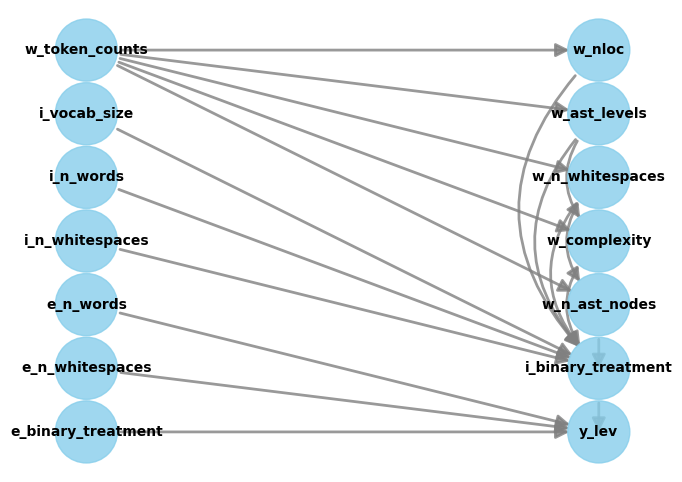

In [47]:
model = CausalModel(
        data = treatment1,
        treatment = ['i_binary_treatment'],
        outcome = ['y_lev'],
        common_causes = ['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes'],
        #instruments = ['i_vocab_size']
        graph= "diagram.dot"
        #common_causes= ['z_nloc']
    )
model.view_model()

## Instrumental variable

In [48]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                   
─────────────────────(E[yₗₑᵥ])
d[i_binary_treatment]         
Estimand assumption 1, Unconfoundedness: If U→{i_binary_treatment} and U→y_lev then P(y_lev|i_binary_treatment,,U) = P(y_lev|i_binary_treatment,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                            
 ⎢                                                      d                     
E⎢────────────────────────────────────────────────────────────────────────────
 ⎣d[i_n_whitespaces  w_n_whitespaces  w_n_ast_nodes  w_nloc  w_complexity  wₐₛ

                                                                              
                                         ⎛                                    
──────────────────────────────────(yₗₑᵥ)⋅⎜────────────────────────────────────
ₜ ₗₑᵥₑₗₛ  i_n_words  i_vocab_size]       

In [41]:
identified_estimand = model.identify_effect()

Instrumental variables: Are the Software Engineering input put prompt metrics

- i_p_n_words
- i_n_whitespaces
- i_vocab_size 

Effect modifiers: Are the software engineering potential outcome metrics
- e_p_n_words
- e_n_whitespaces
- e_vocab_size 

- Model parameters
- Loss prediction
- Sampling


Developer experience,
Demographic info
machine generated? 
Is a code debug?

## Action items

- [] dependent and independent cofounders
- [ ] compute cofounders correlation 

In [42]:
treatments_df.shape

In [49]:
estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", test_significance=True)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                                                                            
 ⎢                                                      d                     
E⎢────────────────────────────────────────────────────────────────────────────
 ⎣d[i_n_whitespaces  w_n_whitespaces  w_n_ast_nodes  w_nloc  w_complexity  wₐₛ

                                                                              
                                         ⎛                                    
──────────────────────────────────(yₗₑᵥ)⋅⎜────────────────────────────────────
ₜ ₗₑᵥₑₗₛ  i_n_words  i_vocab_size]       ⎝d[i_n_whitespaces  w_n_whitespaces  

                                                                              
                  d                                                           
─────────────────────────────────────────────────────────

In [43]:
causal_estimate_strat = model.estimate_effect(identified_estimand,method_name="backdoor.propensity_score_stratification")

In [245]:
causal_estimate_matching = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.propensity_score_matching")

In [247]:
print(causal_estimate_matching)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(E[y_lev|w_nloc,w_ast_levels,w_n_ast_nodes,w_n_whitespace
d[i_binary_treatment]                                                         

                               
s,w_token_counts,w_complexity])
                               
Estimand assumption 1, Unconfoundedness: If U→{i_binary_treatment} and U→y_lev then P(y_lev|i_binary_treatment,w_nloc,w_ast_levels,w_n_ast_nodes,w_n_whitespaces,w_token_counts,w_complexity,U) = P(y_lev|i_binary_treatment,w_nloc,w_ast_levels,w_n_ast_nodes,w_n_whitespaces,w_token_counts,w_complexity)

## Realized estimand
b: y_lev~i_binary_treatment+w_nloc+w_ast_levels+w_n_ast_nodes+w_n_whitespaces+w_token_counts+w_complexity
Target units: ate

## Estimate
Mean value: 9.218154863724484



In [51]:
es_placebo = model.refute_estimate(
                identified_estimand,
                estimate,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
        )

In [52]:
print(es_placebo)

Refute: Use a Placebo Treatment
Estimated effect:1071.2913571431268
New effect:1041.1032661706752
p value:0.0



In [53]:
treatment1[['y_lev','i_binary_treatment']].groupby('i_binary_treatment').describe()

y_lev                                                    \
                     count        mean         std  min    25%    50%    75%   
i_binary_treatment                                                             
False               2923.0  591.967157  574.681895  0.0  243.0  464.0  767.5   
True                2923.0  703.023948  581.868063  0.0  369.5  577.0  857.5   

                             
                        max  
i_binary_treatment           
False               10913.0  
True                10919.0

In [14]:
from scipy import stats
import itertools

In [15]:
confounders =['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes']

In [19]:
for z0,z1 in itertools.product(confounders,confounders):
    #print(z1)
    tmp= stats.pearsonr(treatments_df[z0],treatments_df[z1])
    spermanr = stats.spearmanr(treatments_df[z0],treatments_df[z1])
    print(z0,z1,tmp, spermanr)

w_ast_levels w_ast_levels PearsonRResult(statistic=0.9999999999999999, pvalue=0.0) SignificanceResult(statistic=0.9999999999999998, pvalue=0.0)
w_ast_levels w_n_whitespaces PearsonRResult(statistic=0.49909613435552663, pvalue=0.0) SignificanceResult(statistic=0.6822881300127996, pvalue=0.0)
w_ast_levels w_complexity PearsonRResult(statistic=0.5287915178516039, pvalue=0.0) SignificanceResult(statistic=0.5856303844701728, pvalue=0.0)
w_ast_levels w_nloc PearsonRResult(statistic=0.4471944519874926, pvalue=0.0) SignificanceResult(statistic=0.5775515581247451, pvalue=0.0)
w_ast_levels w_token_counts PearsonRResult(statistic=0.5270006805549072, pvalue=0.0) SignificanceResult(statistic=0.6785033697899441, pvalue=0.0)
w_ast_levels w_n_ast_nodes PearsonRResult(statistic=0.5993442827736035, pvalue=0.0) SignificanceResult(statistic=0.7326915001787035, pvalue=0.0)
w_n_whitespaces w_ast_levels PearsonRResult(statistic=0.49909613435552663, pvalue=0.0) SignificanceResult(statistic=0.6822881300127996,